# Project 11: Projections, eigenvectors, Principal Component Analysis, and face recognition algorithms

In [1]:
#Q1. Load 30 grayscale images from the 'database' folder, reshape each image into a column vector, and stack them into a matrix P. Also, print the database size, image dimensions, and matrix shape.
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Parameters
Database_Size = 30
database_path = 'database'

# Initialize list to store image vectors
P = []

# Reading images from the database
for j in range(1, Database_Size + 1):
    image_path = os.path.join(database_path, f'person{j}.pgm')
    image = Image.open(image_path)
    image_array = np.array(image)

    # Get dimensions of the image
    m, n = image_array.shape

    # Reshape the image array to a column vector
    image_vector = image_array.reshape(m * n, 1)
    P.append(image_vector)

# Convert list to numpy array (matrix)
P = np.hstack(P)

# Print out the variables for verification
print(f"Database Size: {Database_Size}")
print(f"Image dimensions (m, n): ({m}, {n})")
print(f"P matrix shape: {P.shape}")

Database Size: 30
Image dimensions (m, n): (112, 92)
P matrix shape: (10304, 30)


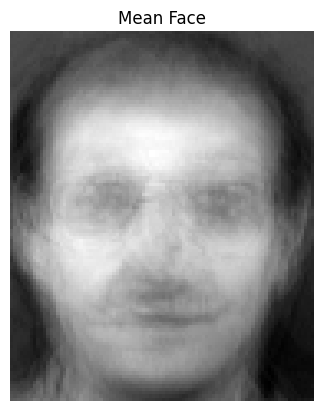

In [2]:
#Q2. Compute the mean face by taking the row-wise mean of matrix P and display it as an image.
# Compute the mean face
mean_face = np.mean(P, axis=1)

# Reshape the mean face back to the original image dimensions
mean_face_image = mean_face.reshape(m, n)

# Display the mean face image
plt.imshow(mean_face_image, cmap='gray')
plt.title('Mean Face')
plt.axis('off')  # Hide axis
plt.show()

In [3]:
#Q3. Convert P to float, subtract the mean face from each image (each column of P), and print the first column to verify.
# Compute the mean face
mean_face = np.mean(P, axis=1)

# Convert P to float (double precision)
P = P.astype(np.float64)

# Subtract the mean face from each column of P
mean_face_column = mean_face.reshape(-1, 1)
P = P - mean_face_column @ np.ones((1, Database_Size))

# Print the first column of P to verify subtraction
print(P[:, 0])

[-38.8        -38.3        -42.73333333 ... -14.56666667 -14.4
 -16.33333333]


In [4]:
#Q4. Compute the covariance matrix PᵗP, find its eigenvalues and eigenvectors, convert them to actual eigenvectors of the original covariance matrix, normalize them, and display the eigenvalues.
# Compute the covariance matrix Pᵗ * P
PTP = P.T @ P

# Compute the eigenvalues and eigenvectors of Pᵗ * P
Values, Vectors = np.linalg.eig(PTP)

# Compute the actual eigenvectors of the original covariance matrix
EigenVectors = P @ Vectors

# Normalize the eigenvectors
EigenVectors = EigenVectors / np.linalg.norm(EigenVectors, axis=0)

# Display the first few eigenvalues for verification
print("Eigenvalues:", Values)

Eigenvalues: [9.69069623e+07 4.87292722e+07 4.37900456e+07 3.34756826e+07
 2.46521889e+07 2.04782347e+07 1.63378623e+07 1.60131047e+07
 1.41415577e+07 1.32446059e+07 3.65586175e-09 1.11004779e+07
 1.06792480e+07 9.84547441e+06 9.27154963e+06 8.44340124e+06
 7.68223964e+06 3.30696241e+06 3.42829390e+06 3.52946256e+06
 3.76629399e+06 4.17775602e+06 7.12503632e+06 6.92200481e+06
 4.74323775e+06 4.98622750e+06 5.37363278e+06 5.60944036e+06
 6.08634551e+06 6.37529704e+06]


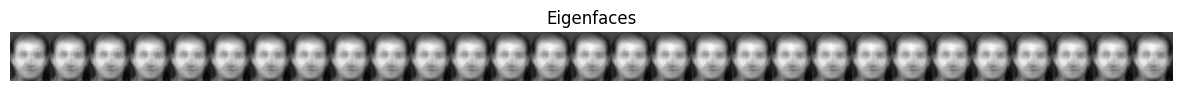

In [5]:
#Q5. Add the mean face back to each eigenvector to get eigenfaces, reshape and stack them horizontally, and display all eigenfaces in a single figure.
# Display the set of eigenfaces
eigenfaces = []

for j in range(1, Database_Size):
    eigenface = EigenVectors[:, j] + mean_face
    eigenface_image = eigenface.reshape(m, n)
    eigenfaces.append(eigenface_image)

# Concatenate the eigenfaces horizontally
EigenFaces = np.hstack(eigenfaces)

# Display the eigenfaces
plt.figure(figsize=(15, 5))
plt.imshow(EigenFaces, cmap='gray')
plt.title('Eigenfaces')
plt.axis('off')  # Hide axis
plt.show()

In [6]:
#Q6. Verify that eigenvectors of the symmetric matrix PPᵗ are orthogonal by computing EigenVectorsᵀ * EigenVectors and checking if the result is diagonal.
# Compute the Products matrix
Products = EigenVectors.T @ EigenVectors

# Print the Products matrix to verify orthogonality
print("Products matrix:")
print(Products)

# Check if Products matrix is diagonal
is_diagonal = np.allclose(Products, np.diag(np.diagonal(Products)))
print(f"Is Products matrix diagonal? {is_diagonal}")


Products matrix:
[[ 1.00000000e+00  2.91433544e-16  1.80888290e-15 -3.69658731e-16
  -2.36789754e-16 -1.65666092e-16  4.20670443e-17  5.33427469e-17
  -9.75781955e-16  1.08420217e-17 -9.97033756e-02  5.89372301e-16
  -4.93311988e-17 -1.06029551e-15 -2.60208521e-17  4.48426019e-16
  -3.81639165e-16  1.68121810e-15 -1.42019643e-15 -4.10695783e-16
   7.88648660e-16  3.29814301e-16 -4.76398435e-16  3.77952877e-16
   1.32706346e-16 -6.81854746e-16 -8.37004077e-17 -1.78893358e-16
  -3.86192814e-16 -1.19533290e-17]
 [ 2.91433544e-16  1.00000000e+00 -6.27102537e-16  1.85398571e-16
   1.03649728e-16  9.28077060e-17  8.00791725e-16 -5.24211750e-16
  -5.19549681e-16  6.50521303e-17 -4.38865537e-01 -9.80118764e-17
   1.64581890e-16 -2.64979011e-16  1.20129601e-16  6.27536217e-16
   1.96565854e-16 -3.82723367e-17 -5.14996032e-17 -7.29125961e-16
   7.33354349e-16 -5.27681197e-16  6.76542156e-17 -2.56955915e-16
  -1.84748050e-16 -5.60424103e-16 -2.47198095e-16 -1.10324347e-16
  -1.08420217e-17 -1.778

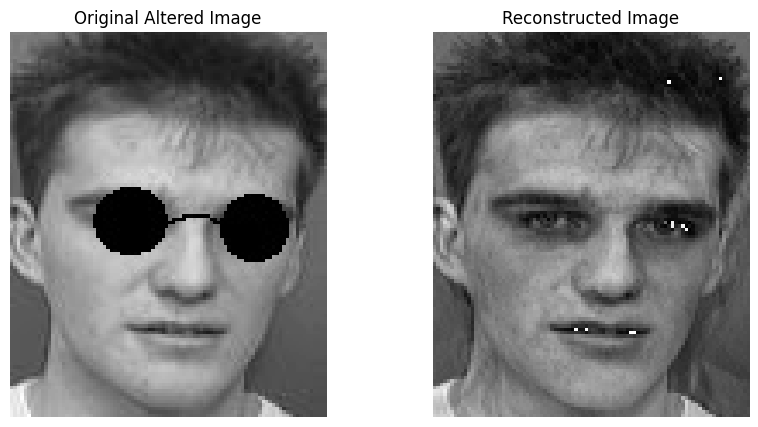

In [7]:
#Q7. Reconstruct an altered face (with sunglasses) using eigenfaces by projecting the altered image onto the eigenface subspace and displaying the result.
# Define image dimensions
m, n = 112, 92

# Read the altered image
altered_image_path = r'database/person30altered1.pgm'
image_read = Image.open(altered_image_path)
image_array = np.array(image_read)

# Reshape altered image into a column vector
U = image_array.reshape(m * n, 1)

# Compute the norms of the eigenvectors
Products = EigenVectors.T @ EigenVectors
NormsEigenVectors = np.diag(Products)

# Compute the projection coefficients
W = EigenVectors.T @ (U.astype(np.float64) - mean_face.reshape(-1, 1))
W = W / NormsEigenVectors.reshape(-1, 1)  # Normalize by eigenvector norms

# Reconstruct the image from the projection
U_approx = EigenVectors @ W + mean_face.reshape(-1, 1)

# Ensure reshaping is valid
if U_approx.shape == (m * n, 1):
    image_approx = U_approx.reshape(m, n).astype(np.uint8)
else:
    raise ValueError(f"Cannot reshape array of size {U_approx.size} into shape ({m}, {n})")

# Display the original altered image and the reconstructed image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Altered Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_approx, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

Shape of U_approx: (10304, 1)
Expected shape: (10304, 1)


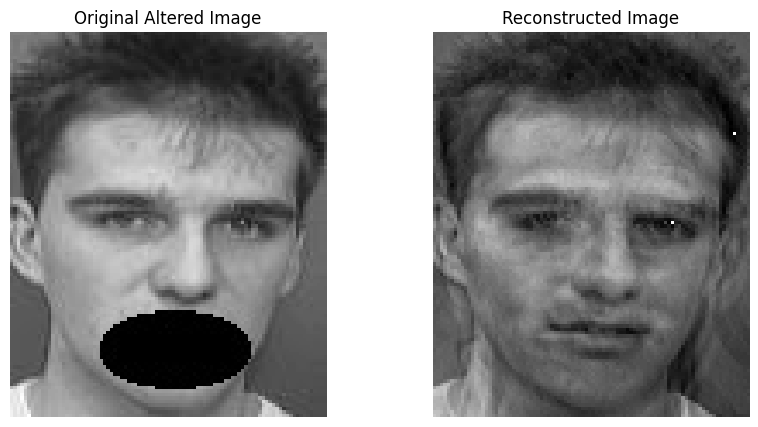

In [8]:
#Q8. Reconstruct an altered face (person30altered2.pgm) using eigenfaces by projecting it onto the eigenface subspace and displaying the reconstructed result.
# Define image dimensions 
m, n = 112, 92

# Set the correct path to the altered image (person30altered2.pgm)
altered_image_path = r'database/person30altered2.pgm'

# Read the altered image 
image_read = Image.open(altered_image_path)
image_array = np.array(image_read)

# Reshape altered image into a column vector
U = image_array.reshape(m * n, 1)

# Compute the norms of the eigenvectors 
Products = EigenVectors.T @ EigenVectors
NormsEigenVectors = np.diag(Products)

# Compute the projection coefficients 
W = EigenVectors.T @ (U.astype(np.float64) - mean_face.reshape(-1, 1))
W = W / NormsEigenVectors.reshape(-1, 1)  # Ensure proper division

# Reconstruct the image from the projection 
U_approx = EigenVectors @ W + mean_face.reshape(-1, 1)

# Print shapes for debugging 
print("Shape of U_approx:", U_approx.shape)
print("Expected shape:", (m * n, 1))

# Ensure the shape matches for reshaping 
if U_approx.shape[0] == m * n and U_approx.shape[1] == 1:
    image_approx = U_approx.reshape(m, n).astype(np.uint8)
else:
    raise ValueError(f"Cannot reshape array of size {U_approx.size} into shape ({m}, {n})")

# Display the original altered image and the reconstructed image 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Altered Image')
plt.axis('off')  # Hide axis

plt.subplot(1, 2, 2)
plt.imshow(image_approx, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')  # Hide axis

plt.show()

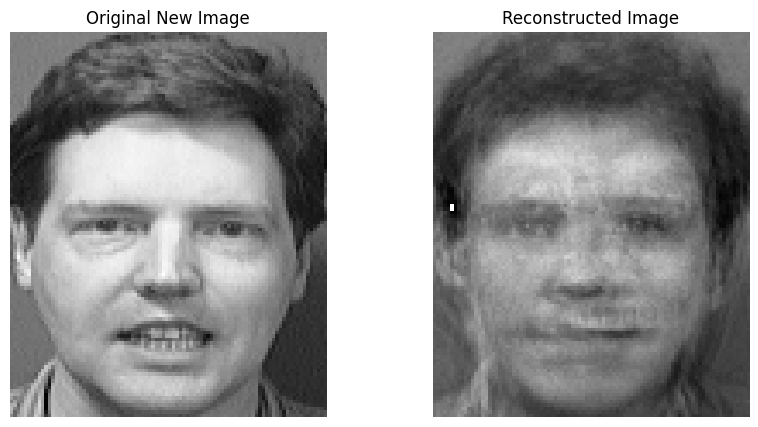

In [9]:
#Q9. Approximate a face not in the database using eigenfaces.
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Image size
m, n = 112, 92

# Load the new face image (not in the training set)
new_image_path = r'database/person31.pgm' 
image_read = Image.open(new_image_path)
image_array = np.array(image_read)

# Flatten the image into a column vector
U = image_array.reshape(m * n, 1).astype(np.float64)

# Project the image onto the eigenface space
W = EigenVectors.T @ (U - mean_face.reshape(-1, 1))
Norms = np.diag(EigenVectors.T @ EigenVectors)
W = W / Norms.reshape(-1, 1)

# Reconstruct the image from the projection
U_approx = EigenVectors @ W + mean_face.reshape(-1, 1)
image_approx = U_approx.reshape(m, n).astype(np.uint8)

# Display original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original New Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_approx, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()